In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
upload = files.upload()

Saving insurance.xlsx to insurance.xlsx


In [7]:
data = pd.read_excel("insurance.xlsx")

# Data Exploration

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [10]:
data.shape

(1338, 7)

Pairwise Linear Correlation for Each Numeric Column

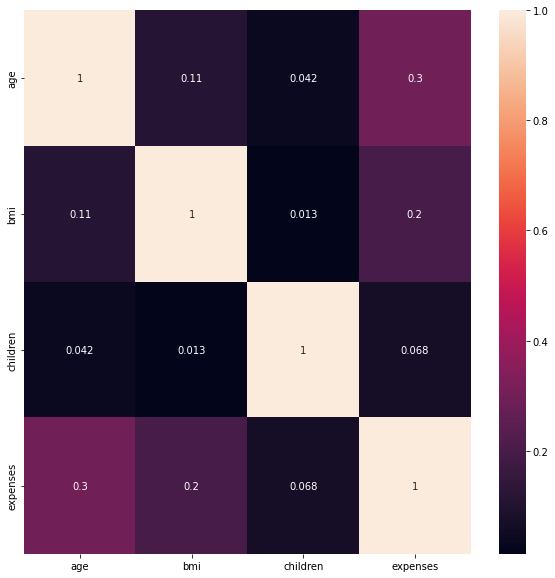

In [11]:
fig, axis = plt.subplots(figsize = (10,10))

corr = data.corr()
sns.heatmap(corr, annot = True, ax = axis)

Label Encoding Object Types 

In [13]:
d_types = dict(data.dtypes)

for name, type_ in d_types.items():
  if str(type_) == "object":
    print(f"---- {name} ----")
    print(data[name].value_counts())
    print()

---- sex ----
male      676
female    662
Name: sex, dtype: int64

---- smoker ----
no     1064
yes     274
Name: smoker, dtype: int64

---- region ----
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64



# Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
for name, type_ in d_types.items():
  if str(type_) == "object":
    labenc = LabelEncoder()
    data[name] = labenc.fit_transform(data[name])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


# --------------------------------------------------------------------


In [25]:
x = data.iloc[:,:-1].values
y = data["expenses"]

print(x.shape)
print(y.shape)

(1338, 6)
(1338,)


In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [28]:
# Standard Scaler transforms data such that mean = 0, std dev = 1 (i:e a standard normal distribution)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print(x_train.shape)
print(x_test.shape)

(1070, 6)
(268, 6)


# confirm that the data is standard scaled

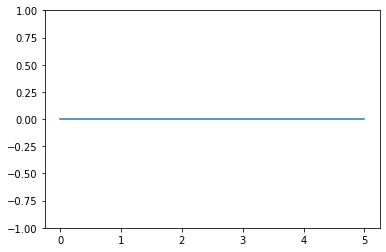

In [29]:
plt.ylim(-1,1)

means = []

for i in range(x.shape[1]):
  means.append(np.mean(x_test[:, i]))

plt.plot(means, scaley = False)

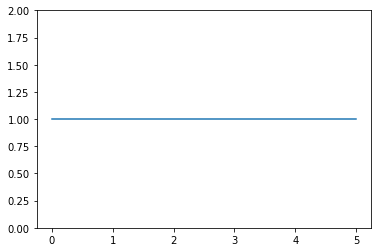

In [34]:
plt.ylim(0,2)

std_dev = []

for i in range(x.shape[1]):
  std_dev.append(np.var(x_test[:, i]))

plt.plot(std_dev)

# Linear Regression Model

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [37]:
# y = w.x + b

print(model.coef_)
print(model.intercept_)

[ 3.61585592e+03 -9.34964340e+00  2.02922213e+03  5.17114360e+02
  9.55678336e+03 -3.02319105e+02]
13346.089869158879


In [39]:
model.coef_.dot(x_test[10,:]) + model.intercept_  # random sample prediction

28432.30126845764

In [41]:
model.predict(x_test[10, :].reshape(1,-1)) # prediction using the model.predict function which yields the same output

array([28432.30126846])